In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',100)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 

In [2]:
Train_set = pd.read_csv("train_data.csv")
Test_set = pd.read_csv("test_data.csv")

In [3]:
Train_set.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
Test_set.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,173560,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,266500,4.125,0.5862,1288.96,240.0,not_neg,not_int,not_lpsm,308000.0,sb,pr,home,1U,9480.0,EXP,502,CIB,55-64,not_inst,86.525974,North,direct,18.0
1,173561,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,116500,4.990,0.6979,1875.00,360.0,neg_amm,not_int,not_lpsm,188000.0,sb,pr,home,1U,1620.0,EXP,526,CIB,55-64,to_inst,61.968085,south,direct,38.0
2,173562,2019,cf,Joint,nopre,type2,p1,l1,nopc,b/c,196500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,208000.0,sb,pr,home,1U,3240.0,CRIF,827,EXP,<25,to_inst,94.471154,North,direct,59.0
3,173563,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,116500,4.750,0.5203,1329.03,360.0,neg_amm,not_int,not_lpsm,128000.0,sb,pr,home,1U,2100.0,EXP,591,CIB,55-64,to_inst,91.015625,North,direct,42.0
4,173564,2019,cf,Joint,nopre,type2,p3,l1,nopc,b/c,306500,NaN,NaN,NaN,360.0,neg_amm,not_int,not_lpsm,318000.0,sb,pr,home,1U,6180.0,EXP,598,EXP,35-44,to_inst,96.383648,North,direct,47.0


In [5]:
Train_set.shape

(148670, 34)

In [6]:
Test_set.shape

(63717, 33)

In [7]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [8]:
Total = Train_set.isnull().sum()
Percentage = (Train_set.isnull().sum()/Train_set.shape[0])*100

Missing_values = pd.DataFrame({'Total' : Total, "Percentage": Percentage}).sort_values(by = 'Total', ascending=False)
Missing_values

,Total,Percentage
Upfront_charges,39642,26.664425
Interest_rate_spread,36639,24.644515
rate_of_interest,36439,24.509989
dtir1,24121,16.224524
LTV,15098,10.155378
property_value,15098,10.155378
income,9150,6.154571
loan_limit,3344,2.249277
approv_in_adv,908,0.610749
submission_of_application,200,0.134526


In [9]:
Total = Test_set.isnull().sum()
Percentage = (Test_set.isnull().sum()/Test_set.shape[0])*100

Missing_values = pd.DataFrame({'Total' : Total, "Percentage": Percentage}).sort_values(by = 'Total', ascending=False)
Missing_values

,Total,Percentage
Upfront_charges,16967,26.628686
Interest_rate_spread,15662,24.580567
rate_of_interest,15573,24.440887
dtir1,10153,15.934523
property_value,6324,9.925138
LTV,6324,9.925138
income,3889,6.103552
loan_limit,1424,2.234882
approv_in_adv,416,0.652887
submission_of_application,89,0.139680


In [10]:
Train_set["Upfront_charges"] = Train_set["Upfront_charges"].fillna(Train_set["Upfront_charges"].mean())
Test_set["Upfront_charges"] = Test_set["Upfront_charges"].fillna(Test_set["Upfront_charges"].mean())

Train_set["Interest_rate_spread"] = Train_set["Interest_rate_spread"].fillna(Train_set["Interest_rate_spread"].mean())
Test_set["Interest_rate_spread"] = Test_set["Interest_rate_spread"].fillna(Test_set["Interest_rate_spread"].mean())

Train_set["rate_of_interest"] = Train_set["rate_of_interest"].fillna(Train_set["rate_of_interest"].mean())
Test_set["rate_of_interest"] = Test_set["rate_of_interest"].fillna(Test_set["rate_of_interest"].mean())

Train_set["dtir1"] = Train_set["dtir1"].fillna(Train_set["dtir1"].mean())
Test_set["dtir1"] = Test_set["dtir1"].fillna(Test_set["dtir1"].mean())

Train_set["property_value"] = Train_set["property_value"].fillna(Train_set["property_value"].mean())
Test_set["property_value"] = Test_set["property_value"].fillna(Test_set["property_value"].mean())

Train_set["LTV"] = Train_set["LTV"].fillna(Train_set["LTV"].mean())
Test_set["LTV"] = Test_set["LTV"].fillna(Test_set["LTV"].mean())

Train_set["income"] = Train_set["income"].fillna(Train_set["income"].mean())
Test_set["income"] = Test_set["income"].fillna(Test_set["income"].mean())

Train_set["loan_limit"] = Train_set["loan_limit"].fillna(Train_set["loan_limit"].mode()[0])
Test_set["loan_limit"] = Test_set["loan_limit"].fillna(Test_set["loan_limit"].mode()[0])

Train_set["approv_in_adv"] = Train_set["approv_in_adv"].fillna(Train_set["approv_in_adv"].mode()[0])
Test_set["approv_in_adv"] = Test_set["approv_in_adv"].fillna(Test_set["approv_in_adv"].mode()[0])

Train_set["submission_of_application"] = Train_set["submission_of_application"].fillna(Train_set["submission_of_application"].mode()[0])
Test_set["submission_of_application"] = Test_set["submission_of_application"].fillna(Test_set["submission_of_application"].mode()[0])

Train_set["age"] = Train_set["age"].fillna(Train_set["age"].mode()[0])
Test_set["age"] = Test_set["age"].fillna(Test_set["age"].mode()[0])

Train_set["loan_purpose"] = Train_set["loan_purpose"].fillna(Train_set["loan_purpose"].mode()[0])
Test_set["loan_purpose"] = Test_set["loan_purpose"].fillna(Test_set["loan_purpose"].mode()[0])

Train_set["Neg_ammortization"] = Train_set["Neg_ammortization"].fillna(Train_set["Neg_ammortization"].mode()[0])
Test_set["Neg_ammortization"] = Test_set["Neg_ammortization"].fillna(Test_set["Neg_ammortization"].mode()[0])

Train_set["term"] = Train_set["term"].fillna(Train_set["term"].mean())
Test_set["term"] = Test_set["term"].fillna(Test_set["term"].mean())

In [11]:
Total = Train_set.isnull().sum()
Percentage = (Train_set.isnull().sum()/Train_set.shape[0])*100

Missing_values = pd.DataFrame({'Total' : Total, "Percentage": Percentage}).sort_values(by = 'Total', ascending=False)
Missing_values.head(2)

,Total,Percentage
ID,0,0.0
Credit_Score,0,0.0


In [12]:
Total = Test_set.isnull().sum()
Percentage = (Test_set.isnull().sum()/Test_set.shape[0])*100

Missing_values = pd.DataFrame({'Total' : Total, "Percentage": Percentage}).sort_values(by = 'Total', ascending=False)
Missing_values.head(2)

,Total,Percentage
ID,0,0.0
lump_sum_payment,0,0.0


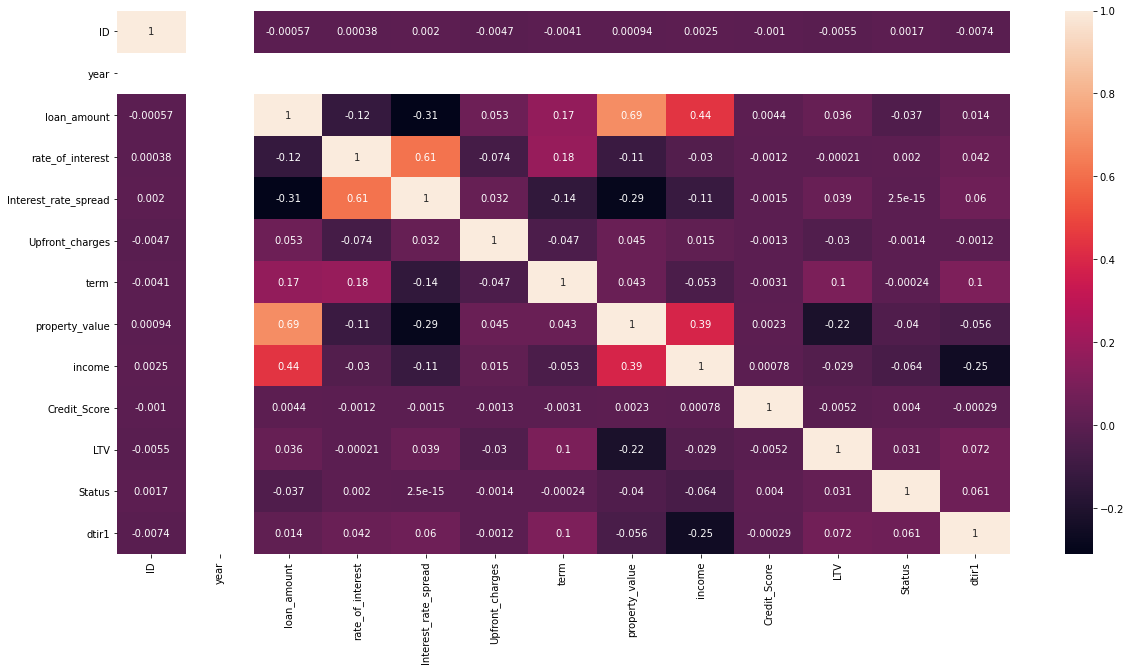

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(Train_set.corr(), annot = True)
plt.show()

In [14]:
Train_set.head(1)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,0.441656,3224.996127,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0


In [15]:
Train_set = Train_set.drop(['ID'], axis = 1)
Test_set_Ids = Test_set['ID']
Test_set.drop('ID',axis = 1,inplace = True)

In [16]:
Num_var = Train_set.select_dtypes(include= np.number)
Num_var.drop(['Status'], axis=1, inplace=True)
Num_var.head(2)

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,2019,116500,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,98.728814,45.000000
1,2019,206500,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,72.746457,37.732932


year


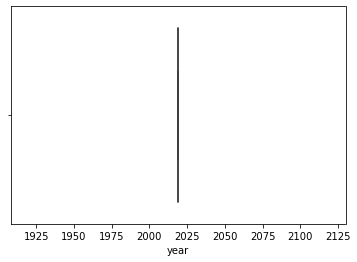

loan_amount


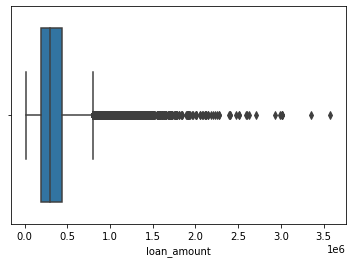

rate_of_interest


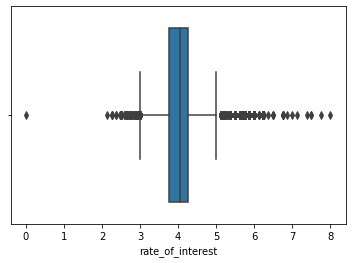

Interest_rate_spread


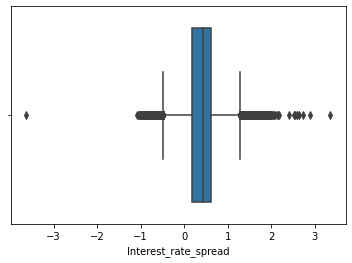

Upfront_charges


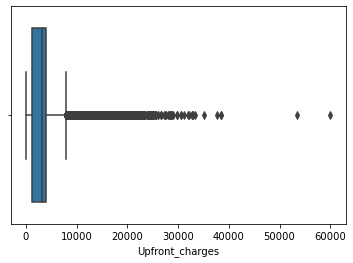

term


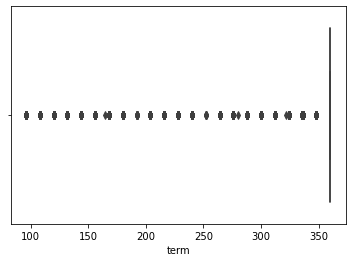

property_value


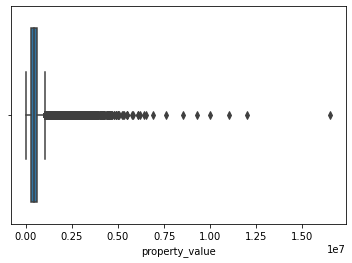

income


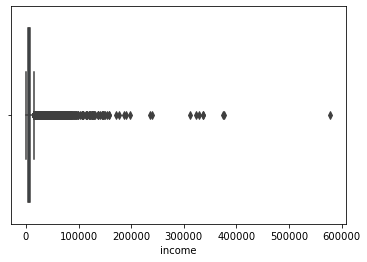

Credit_Score


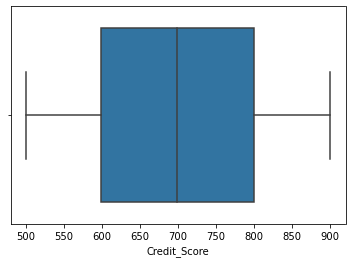

LTV


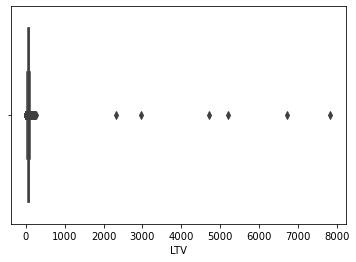

dtir1


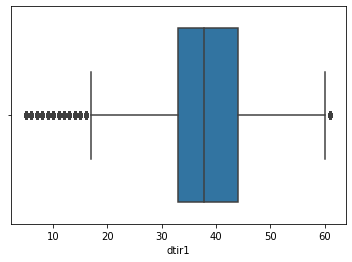

In [17]:
 for i in Num_var:
    print(i)
    sns.boxplot(Num_var[i])
    plt.show()

In [18]:
df_target = Train_set['Status']

In [19]:
scaler = StandardScaler()
x = Num_var
Num_var_scaled = scaler.fit_transform(Num_var)

df_num_scaled = pd.DataFrame(Num_var_scaled, columns = x.columns)
df_num_scaled.head(2)

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,0.0,-1.166980,-1.922896e-12,4.237894e-15,-3.626057e-14,0.425737,-1.113507,-0.829008,0.502357,6.858451e-01,7.529012e-01
1,0.0,-0.677607,-1.922896e-12,4.237894e-15,-3.626057e-14,0.425737,0.000000,-0.314189,-1.275413,-7.990009e-14,-7.361545e-16


In [20]:
Num_var_test = Test_set.select_dtypes(include=np.number)
Num_var_test.head(1)

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,2019,266500,4.125,0.5862,1288.96,240.0,308000.0,9480.0,502,86.525974,18.0


In [21]:
scaler = StandardScaler()
Num_var_scaled = scaler.fit_transform(Num_var_test)
df_num_scaled_test = pd.DataFrame(Num_var_scaled, columns = x.columns)
df_num_scaled_test.head(1)

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,0.0,-0.351832,0.166634,0.32897,-0.688283,-1.631692,-0.549264,0.461607,-1.711335,0.270981,-2.038806


In [24]:
Cat_var = Train_set.select_dtypes(include = "object")
Cat_var.head(2)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct


In [25]:
for i in Cat_var:
    print(Cat_var[i].unique())

['cf' 'ncf']
['Sex Not Available' 'Male' 'Joint' 'Female']
['nopre' 'pre']
['type1' 'type2' 'type3']
['p1' 'p4' 'p3' 'p2']
['l1' 'l2']
['nopc' 'opc']
['nob/c' 'b/c']
['not_neg' 'neg_amm']
['not_int' 'int_only']
['not_lpsm' 'lpsm']
['sb' 'mh']
['pr' 'sr' 'ir']
['home' 'land']
['1U' '2U' '3U' '4U']
['EXP' 'EQUI' 'CRIF' 'CIB']
['CIB' 'EXP']
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
['to_inst' 'not_inst']
['south' 'North' 'central' 'North-East']
['direct' 'Indriect']


In [26]:
def Encoding(x):
    if x.dtype == 'object':
        x= LabelEncoder().fit_transform(x)
    return x

In [27]:
Cat_var_coded = Cat_var.apply(lambda x: Encoding(x))
Cat_var_coded.head(2)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0,3,0,0,0,0,0,1,1,1,1,1,1,0,0,3,0,0,1,3,1
1,0,2,0,1,0,0,0,0,1,1,0,1,1,0,0,2,1,3,1,0,1


In [28]:
Cat_var_test = Test_set.select_dtypes(include = "object")
Cat_var_test.head(2)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,55-64,not_inst,North,direct
1,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,55-64,to_inst,south,direct


In [29]:
Cat_var_test_encoded = Cat_var_test.apply(lambda x: Encoding(x))
Cat_var_test_encoded.head(2)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0,2,0,0,3,0,0,1,1,1,1,1,1,0,0,3,0,3,0,0,1
1,0,3,0,0,2,0,0,1,0,1,1,1,1,0,0,3,0,3,1,3,1


In [30]:
Train_set = pd.concat([df_num_scaled, Cat_var_coded, df_target], axis = 1)
Train_set.head(1)

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,0.0,-1.16698,-1.922896e-12,4.237894e-15,-3.626057e-14,0.425737,-1.113507,-0.829008,0.502357,0.685845,0.752901,0,3,0,0,0,0,0,1,1,1,1,1,1,0,0,3,0,0,1,3,1,1


In [31]:
Test_set = pd.concat([df_num_scaled_test, Cat_var_test_encoded], axis = 1)
Test_set.head(1)

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0.0,-0.351832,0.166634,0.32897,-0.688283,-1.631692,-0.549264,0.461607,-1.711335,0.270981,-2.038806,0,2,0,0,3,0,0,1,1,1,1,1,1,0,0,3,0,3,0,0,1


In [32]:
Train_set_copy = Train_set.copy()
Train_set_copy.head(1)

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,0.0,-1.16698,-1.922896e-12,4.237894e-15,-3.626057e-14,0.425737,-1.113507,-0.829008,0.502357,0.685845,0.752901,0,3,0,0,0,0,0,1,1,1,1,1,1,0,0,3,0,0,1,3,1,1


In [33]:
from scipy import stats

In [34]:
x1 = []
x2 = []

for i in df_num_scaled: #       
    fstat,pvalue = stats.f_oneway(Train_set_copy[Train_set_copy['Status'] == 0][i],Train_set_copy[Train_set_copy['Status'] == 1][i])
    x1.append(i)
    x2.append(np.format_float_positional(pvalue))
stat_test = pd.DataFrame(x2,index=x1,columns=['Pvalue'])
stat_test['Significant'] = stat_test['Pvalue'].apply(lambda x: 'Yes' if float(x) < 0.05 else 'No') 
stat_test

,Pvalue,Significant
year,nan,No
loan_amount,0.00000000000000000000000000000000000000000000...,Yes
rate_of_interest,0.4516286635854281,No
Interest_rate_spread,1.,No
Upfront_charges,0.5830551891636082,No
term,0.9263380046744619,No
property_value,0.00000000000000000000000000000000000000000000...,Yes
income,0.00000000000000000000000000000000000000000000...,Yes
Credit_Score,0.12265440255954797,No
LTV,0.00000000000000000000000000000000068766134226...,Yes


In [35]:
x3 = []
x4 = []

for i in(Cat_var_coded.columns):
    teststats,pvalue,dof,exp_freq = stats.chi2_contingency(pd.crosstab(Train_set[i],Train_set['Status']))
    x3.append(i)
    x4.append(np.format_float_positional(pvalue))
stat_test_1 = pd.DataFrame(x4,index=x3,columns=['Pvalue'])
stat_test_1['Significant'] = stat_test_1['Pvalue'].apply(lambda x: 'Yes' if float(x) < 0.05 else 'No') 
stat_test_1

,Pvalue,Significant
loan_limit,0.00000000000000000000000000000000000000000000...,Yes
Gender,0.00000000000000000000000000000000000000000000...,Yes
approv_in_adv,0.00000000000000000000000000000000000000000000...,Yes
loan_type,0.00000000000000000000000000000000000000000000...,Yes
loan_purpose,0.00000000000000000000000000000000000000000000...,Yes
Credit_Worthiness,0.00000000000000000000000000000000000000003922...,Yes
open_credit,0.00014571689037135412,Yes
business_or_commercial,0.00000000000000000000000000000000000000000000...,Yes
Neg_ammortization,0.,Yes
interest_only,0.00000009395377090231088,Yes


In [36]:
Train = Train_set.drop(['year','Interest_rate_spread','Upfront_charges'],axis=1)

In [37]:
X = Train.drop(['Status'], axis = 1)
y = Train['Status']

In [ ]:
1.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 0.7775274096993341
Testing Accuracy 0.7767202529091276


Train ROC AUC score: 0.582299407776732
Test ROC AUC score: 0.5781815553063417


Train Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     89582
           1       0.67      0.20      0.30     29354

    accuracy                           0.78    118936
   macro avg       0.73      0.58      0.59    118936
weighted avg       0.76      0.78      0.73    118936

Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     22449
           1       0.65      0.19      0.29      7285

    accuracy                           0.78     29734
   macro avg       0.72      0.58      0.58     29734
weighted avg       0.75      0.78      0.73     29734



In [ ]:
2.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 0.8883517185713324
Testing Accuracy 0.8820542140310755


Train ROC AUC score: 0.7829399925759073
Test ROC AUC score: 0.7718175290209398


Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     89582
           1       0.95      0.57      0.72     29354

    accuracy                           0.89    118936
   macro avg       0.92      0.78      0.82    118936
weighted avg       0.90      0.89      0.88    118936

Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     22449
           1       0.94      0.56      0.70      7285

    accuracy                           0.88     29734
   macro avg       0.91      0.77      0.81     29734
weighted avg       0.89      0.88      0.87     29734



3. best

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 50,
                                  min_samples_split = 10,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

model.fit(X_train,y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

print("Training Accuracy", model.score(X_train,y_train))
print("Testing Accuracy", model.score(X_test,y_test))

print("\n")
print("Train ROC AUC score:",metrics.roc_auc_score(y_train,train_predicted))
print("Test ROC AUC score:",metrics.roc_auc_score(y_test,test_predicted))
print("\n")

print("Train Classification Report:\n", classification_report(y_train,train_predicted))
print("Test Classification Report:\n", classification_report(y_test,test_predicted))

Training Accuracy 0.9985874756171387
Testing Accuracy 0.9989237909463914


Train ROC AUC score: 0.9971383797778838
Test ROC AUC score: 0.9978037062457104


Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     89582
           1       1.00      0.99      1.00     29354

    accuracy                           1.00    118936
   macro avg       1.00      1.00      1.00    118936
weighted avg       1.00      1.00      1.00    118936

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22449
           1       1.00      1.00      1.00      7285

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [44]:
Test = Test_set.drop(['year','Interest_rate_spread','Upfront_charges'],axis=1)
Test.head(2)

,loan_amount,rate_of_interest,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,-0.351832,0.166634,-1.631692,-0.549264,0.461607,-1.711335,0.270981,-2.038806,0,2,0,0,3,0,0,1,1,1,1,1,1,0,0,3,0,3,0,0,1
1,-1.158243,1.941540,0.423045,-0.890519,-0.950491,-1.504588,-0.217362,0.029963,0,3,0,0,2,0,0,1,0,1,1,1,1,0,0,3,0,3,1,3,1


In [45]:
Final_Prediction = pipe.predict(Test)
submission=pd.DataFrame([Test_set_Ids,Final_Prediction]).T
submission.rename(columns={"Unnamed 0": "Status"},inplace=True)
submission.to_csv('submission.csv',index = False)

In [46]:
submission.head()

,ID,Status
0,173560,0
1,173561,0
2,173562,1
3,173563,0
4,173564,1
